In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

这个一张普通的matplotlib绘图：

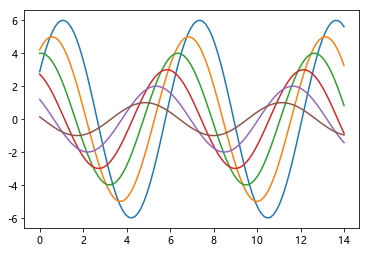

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)


sinplot()

使用seaborn的`set()`方法，可以将matplotlib绘图转换为seaborn绘图。  
若之前有过修改seaborn风格或部分参数，`set()`方法会重置为默认值。

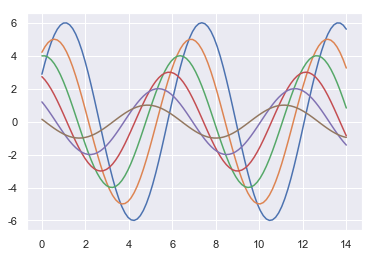

In [3]:
sns.set()
sinplot()

## 1.Seaborn绘图风格设置 

Seaborn的绘图风格由两个独立的参数组合进行设置，一组设置绘图的外观风格，一组对绘图的各元素按比例进行缩放。  
每组参数组合都有两个方法来进行不同操作：
- 外观风格：`axes_style()`，`set_style()`
- 绘图缩放：`plotting_context()`，`set_context()`

### 外观风格
Seaborn共有五种风格，分别是：darkgrid（默认）, whitegrid, dark, white, ticks。  
- `axes_style()`：返回当前风格的所有参数及其设置，若代入指定风格名称则显示该风格的所有参数和设置
- `set_style()`：代入`rc`参数字典进行指定参数设置，代入`style`风格名称修改整体风格

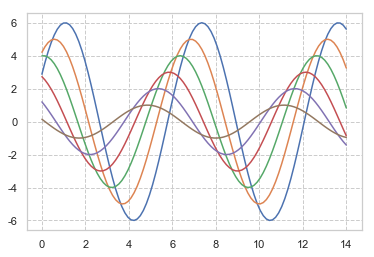

In [4]:
# 设置整体风格为whitegrid，网格类型为虚线
sns.set_style(style='whitegrid', rc={'grid.linestyle': '--'})
sinplot()

### 移除轴脊柱
图表上方和右侧有不必要的轴脊柱，可以使用`despine()`方法来移除。  
`offset`参数可以对刻度轴进行偏置位移，`trim=True`参数可以将刻度轴限制在刻度范围内。  
方向参数如`left=True`可以将此方向的刻度轴移除。

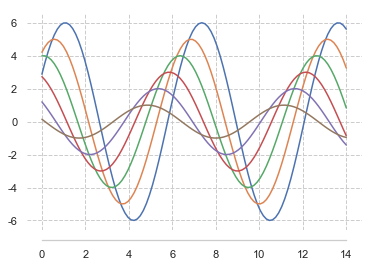

In [5]:
sinplot()
# 移除了上方和右侧轴脊柱，并对刻度轴进行位移，长度限制在刻度范围内，并移除左侧刻度轴
sns.despine(offset=10, trim=True, left=True)

### 临时设置绘图风格
在`with`语句中使用`axes_style()`可以临时设置绘图风格，方便多种风格共存，而无需来回切换。

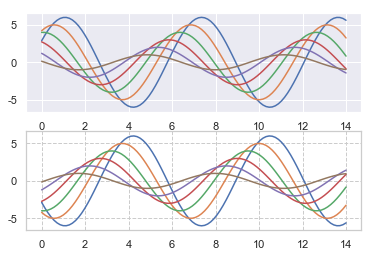

In [6]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

### 绘图元素比例缩放
Seaborn有四个预置的缩放尺寸`context`，从小到大分别为：paper, notebook（默认）, talk, poster。  
- plotting_context()：返回当前尺寸或指定尺寸的参数值
- set_context()：代入尺寸名称或字典参数进行相应设置，`context`参数指定尺寸名称，`rc`为字典参数，`font_scale`为字体大小

同样支持`with`语句进行临时比例缩放设置。

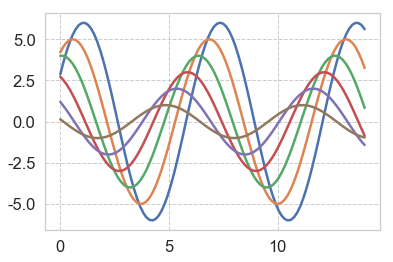

In [7]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()